In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [200]:
df = pd.read_csv("StudentsPerformance.csv")

In [201]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [202]:
df.shape

(1000, 8)

In [203]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [19]:
print(df.duplicated().sum())


0


In [9]:

numeric_cols = ['math score', 'reading score', 'writing score']

df_clean = df.copy()
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Outliers removed successfully!")
print(f"Original shape: {df.shape}")
print(f"New shape: {df_clean.shape}")


Outliers removed successfully!
Original shape: (1000, 8)
New shape: (986, 8)


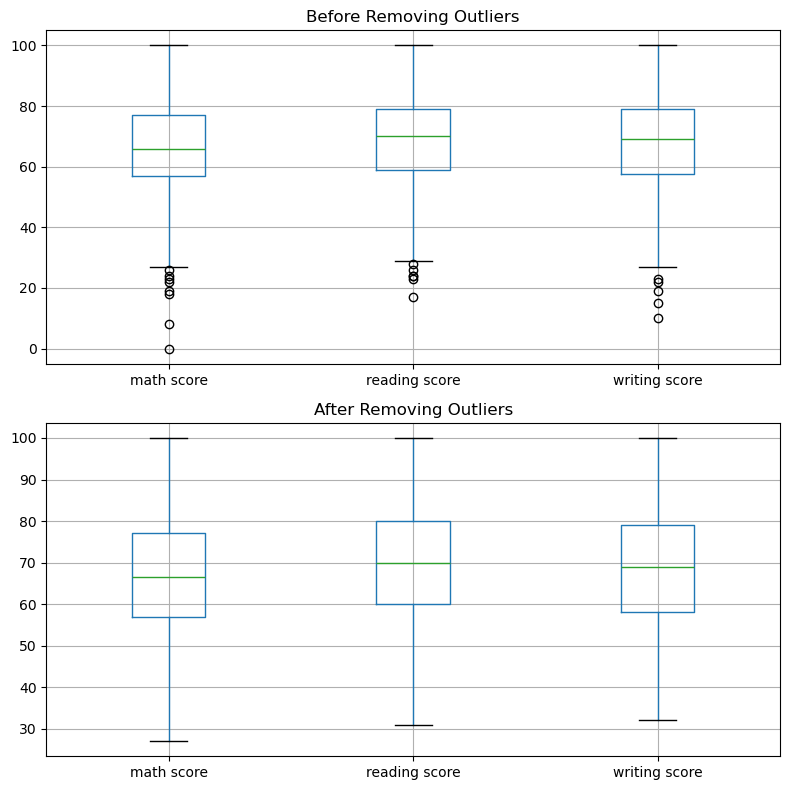

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(8,8))
df[numeric_cols].boxplot(ax=axes[0])
axes[0].set_title("Before Removing Outliers")

df_clean[numeric_cols].boxplot(ax=axes[1])
axes[1].set_title("After Removing Outliers")

plt.tight_layout()
plt.show()


Skewness of numerical columns:
 math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64


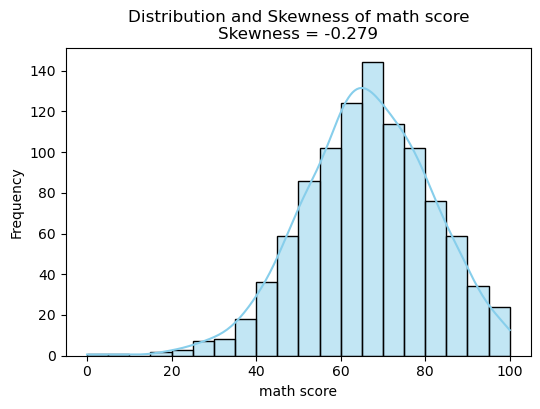

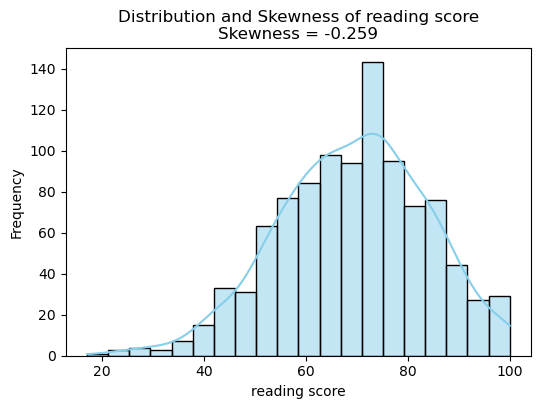

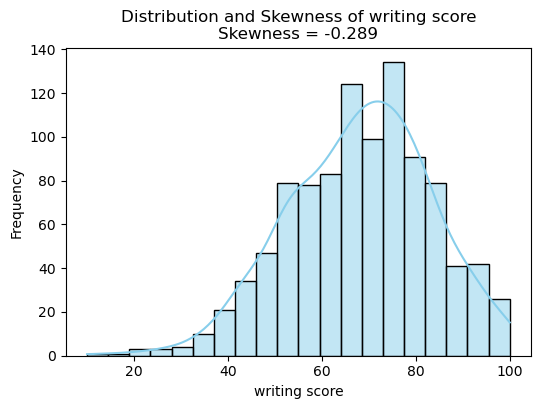

In [ ]:

columns = ['math score', 'reading score', 'writing score']

skew_values = df[columns].skew()
print("Skewness of numerical columns:\n", skew_values)

for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution and Skewness of {col}\nSkewness = {skew_values[col]:.3f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [205]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['race/ethnicity', 'lunch']  # only encode these with LabelEncoder
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# 1 = completed, 0 = none
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})


In [206]:
df.head(5)  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,bachelor's degree,1,0,72,72,74
1,female,2,some college,1,1,69,90,88
2,female,1,master's degree,1,0,90,95,93
3,male,0,associate's degree,0,0,47,57,44
4,male,2,some college,1,0,76,78,75


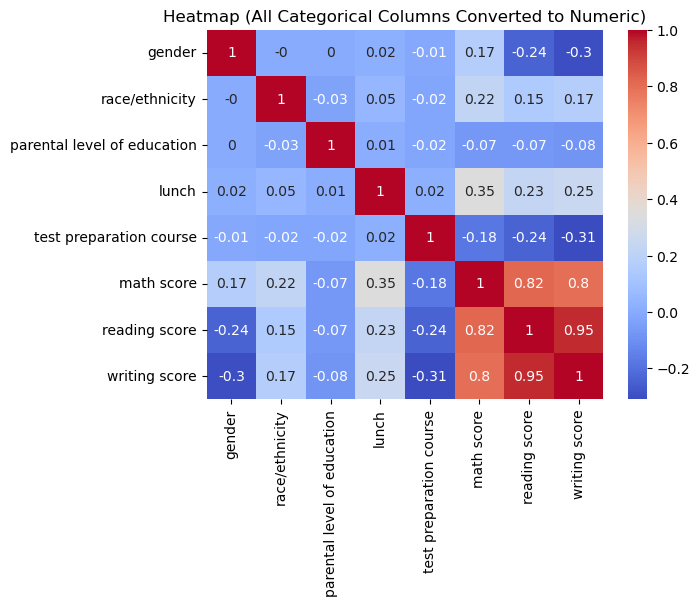

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

corr = df.corr().round(2)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap (All Categorical Columns Converted to Numeric)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv("StudentsPerformance.csv")

X = df[['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['math score']

encoder = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first'), ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])],
    remainder='drop'
)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

student = pd.DataFrame({
    'race/ethnicity': ['group C'],
    'parental level of education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed']
})

student_encoded = encoder.transform(student)
predicted_score = model.predict(student_encoded)
print("\nPredicted Math Score:", round(predicted_score[0], 2))

r2 = model.score(X_test, y_test)
print("R^2 on test set:", round(r2, 4))

names = [name.split('__')[-1] for name in encoder.get_feature_names_out()]
coef = model.coef_
df_coef = pd.DataFrame({'Feature': names, 'Coefficient': coef})

student_features = [
    'race/ethnicity_group C',
    "parental level of education_bachelor's degree",
    'lunch_standard',
    'test preparation course_completed'
]

coefficients_of_student = df_coef[df_coef['Feature'].isin(student_features)].reset_index(drop=True)
print("\nCoefficients for the given student's features:\n")
print(coefficients_of_student)

print("\nIntercept (constant value):", round(model.intercept_, 2))



Predicted Math Score: 76.28
R^2 on test set: 0.1327

Coefficients for the given student's features:

                                         Feature  Coefficient
0                         race/ethnicity_group C    -0.320822
1  parental level of education_bachelor's degree     3.043359
2                                 lunch_standard    11.591341

Intercept (constant value): 61.97


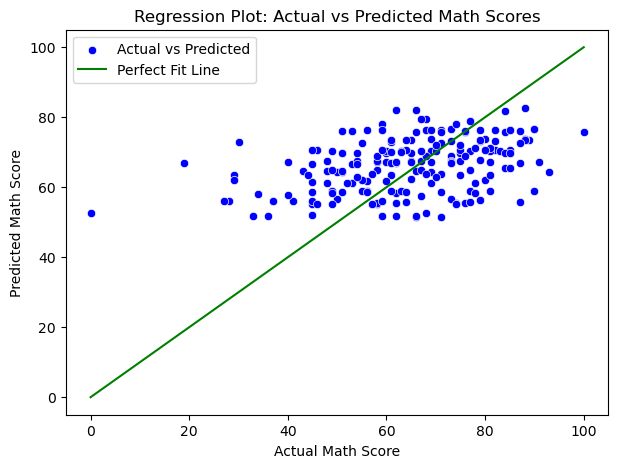

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual vs Predicted')

sns.lineplot(x=y_test, y=y_test, color='green', label='Perfect Fit Line')

plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Regression Plot: Actual vs Predicted Math Scores')
plt.legend()
plt.show()

